In [192]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
import warnings
warnings.filterwarnings('ignore')

In [194]:
from sklearn.svm import SVC

In [195]:
from  sklearn         import  metrics
from  sklearn.metrics import  accuracy_score
from  sklearn.metrics import  precision_score
from  sklearn.metrics import  recall_score
from  sklearn.metrics import  f1_score
from  sklearn.metrics import  confusion_matrix
from  sklearn.metrics import  ConfusionMatrixDisplay
from  sklearn.metrics import  classification_report

from  sklearn.model_selection import  cross_val_score
from  sklearn.model_selection import  train_test_split
from  sklearn.model_selection import  GridSearchCV

In [196]:
dataset = pd.read_csv('WeightHeight.csv') 
df = pd.DataFrame(dataset) 
df

,W,H,Normal
0,88,173,yes
1,95,180,yes
2,100,191,yes
3,70,177,yes
4,50,160,yes
5,60,150,yes
6,75,165,yes
7,130,170,no
8,70,192,no
9,60,190,no


In [197]:
df.shape

(13, 3)

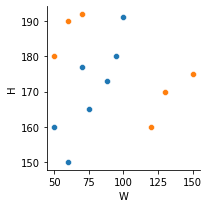

In [198]:
fg = sns.FacetGrid(df, hue='Normal')
fg.map(sns.scatterplot, 'W', 'H');
#fg.add_legend(loc=0);

In [199]:
X = df.drop(['Normal'], axis=1)  
X

,W,H
0,88,173
1,95,180
2,100,191
3,70,177
4,50,160
5,60,150
6,75,165
7,130,170
8,70,192
9,60,190


In [200]:
y = df['Normal'] 
y

0     yes
1     yes
2     yes
3     yes
4     yes
5     yes
6     yes
7      no
8      no
9      no
10     no
11     no
12     no
Name: Normal, dtype: object

In [201]:
# ml

In [202]:
clf = SVC(kernel='poly')     

In [203]:
clf.fit(X, y)

SVC(kernel='poly')

In [204]:
clf.predict([[90,180]])

array(['yes'], dtype=object)

In [205]:
X_test = [[50,175],[60,190],[125,160],[120,150],[120,190],[98,175],[78,170]]
y_test = ['no','no','no','no','yes','yes','yes']

y_pred = clf.predict(X_test)
y_pred

array(['no', 'no', 'no', 'no', 'no', 'yes', 'yes'], dtype=object)

In [206]:
y_test == y_pred

array([ True,  True,  True,  True, False,  True,  True])

In [207]:
confusion_matrix(y_test, y_pred)

array([[4, 0],
       [1, 2]])

In [208]:
arr = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = arr.reshape(-1)  
tn, fp, fn, tp

(4, 0, 1, 2)

In [209]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

          no       0.80      1.00      0.89         4
         yes       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



In [210]:
metrics.precision_recall_fscore_support(y_test, y_pred) 

(array([0.8, 1. ]),
 array([1.        , 0.66666667]),
 array([0.88888889, 0.8       ]),
 array([4, 3]))

In [211]:
metrics.precision_recall_fscore_support(y_test, y_pred, average='weighted') 

(0.8857142857142858, 0.8571428571428571, 0.8507936507936508, None)

In [212]:
# train_test_split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)   #, random_state=27

In [214]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9, 2), (4, 2), (9,), (4,))

In [215]:
X_test

,W,H
2,100,191
11,150,175
3,70,177
10,120,160


In [216]:
clf = SVC(kernel='poly')     
clf.fit(X_train,y_train)

SVC(kernel='poly')

In [217]:
y_pred = clf.predict(X_test)

In [218]:
arr = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = arr.reshape(-1)  
tn, fp, fn, tp

(1, 1, 1, 1)

In [219]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

          no       0.50      0.50      0.50         2
         yes       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



In [220]:
# cross validation

In [221]:
clf = SVC(kernel='poly')     
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
scores

array([1. , 0.5, 1. , 1. , 1. ])

In [222]:
scores.mean()

0.9

In [223]:
#

In [224]:
p = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma'  : ['scale', 'auto'],
    'degree' : [1, 2, 3, 4, 5]
}

g = GridSearchCV(clf, p, n_jobs= -1, cv=5)
g.fit(X_train, y_train)
print(g.best_params_) 

{'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [225]:
#

In [226]:
models = []
models.append(('Poly'  , SVC(kernel='poly', degree= 2, gamma= 'auto')))
models.append(('Linear', SVC(kernel='linear')))
models.append(('RBF'   , SVC(kernel='rbf')))


results = []
names = []

for name, model in models:
	cvr = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
	results.append(cvr)
	names.append(name)
	print('%s : %0.2f' % (name, cvr.mean()))

Poly : 0.80
Linear : 0.60
RBF : 0.40
